### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Load data if needed
if "pd" not in globals():
    import pandas as pd
if "data" not in globals():
    data = pd.read_csv("data/coupons.csv")

# 1) Missing values per column
missing_by_col = data.isna().sum().sort_values(ascending=False)
missing_nonzero = missing_by_col[missing_by_col > 0]

# 2) Quick checks for problematic placeholders in string columns
string_cols = data.select_dtypes(include="object")
placeholder_counts = string_cols.apply(
    lambda col: col.astype(str).str.strip().str.lower().isin({"nan", "none", "null", "", "na"}).sum()
).sort_values(ascending=False)
placeholder_nonzero = placeholder_counts[placeholder_counts > 0]

# 3) Duplicate rows check
num_duplicates = int(data.duplicated().sum())

# User-readable summary
if missing_nonzero.empty:
    print("Missing values: none found.")
else:
    print("Missing values found in these columns:")
    print(missing_nonzero)

if placeholder_nonzero.empty:
    print("Problematic placeholders: none found in string columns.")
else:
    print("Problematic placeholders found in these columns:")
    print(placeholder_nonzero)

print(f"Duplicate rows: {num_duplicates}")


# The column 'toCoupon_GEQ25min' is a binary indicator column that specifies whether the estimated travel time to obtain the coupon is greater than or equal to 25 minutes.
# A value of 1 means the travel time is at least 25 minutes, while 0 means it is less than 25 minutes.



Missing values found in these columns:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64
Problematic placeholders found in these columns:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64
Duplicate rows: 74


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:

# If the value of the 'car' column is empty (NaN), fill it with "NA"
if "car" in data.columns:
    data["car"] = data["car"].fillna("NA")

# If the value of the 'CoffeeHouse' column is empty (NaN), fill it with "never"
if "CoffeeHouse" in data.columns:
    data["CoffeeHouse"] = data["CoffeeHouse"].fillna("never")

# If the value of the 'CarryAway' column is empty (NaN), fill it with "0"
if "CarryAway" in data.columns:
    data["CarryAway"] = data["CarryAway"].fillna("0")

# If the value of the 'Bar' column is empty (NaN), fill it with "never"
if "Bar" in data.columns:
    data["Bar"] = data["Bar"].fillna("never")

# If the value of the 'RestaurantLessThan20' column is empty (NaN), fill it with "never"
if "RestaurantLessThan20" in data.columns:
    data["RestaurantLessThan20"] = data["RestaurantLessThan20"].fillna("never")

# If the value of the 'Restaurant20To50' column is empty (NaN), fill it with "never"
if "Restaurant20To50" in data.columns:
    data["Restaurant20To50"] = data["Restaurant20To50"].fillna("never")

display(data.head())

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Proportion of total observations that accepted the coupon (Y == 1)
AcceptedRows = data[data["Y"] == 1] 
print(len(AcceptedRows))
print(len(data))

prop_accepted = (data["Y"] == 1).mean()
print(f"Proportion accepted: {prop_accepted:.4f} ({prop_accepted:.2%})")


7210
12684
Proportion accepted: 0.5684 (56.84%)


5. Use a bar plot to visualize the `coupon` column.

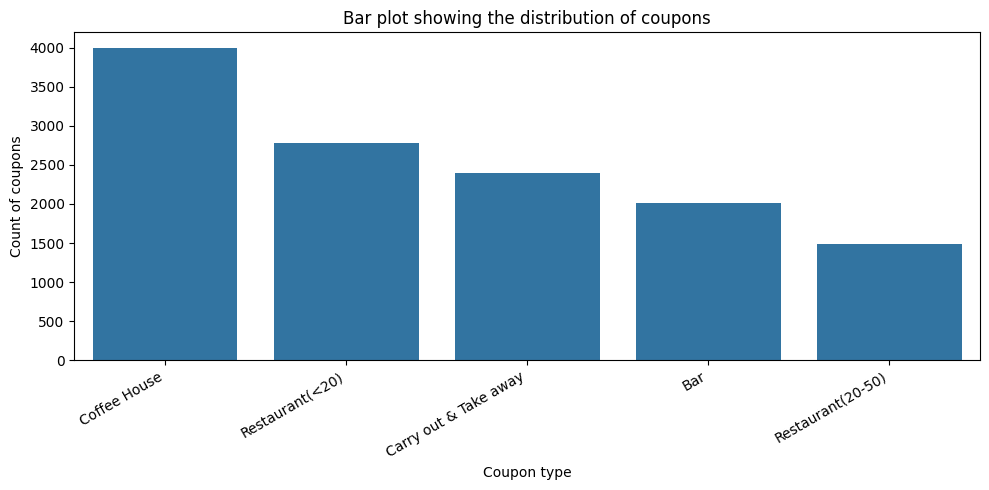

In [7]:
# Bar plot of coupon types (counts)
plt.figure(figsize=(10, 5))
order = data["coupon"].value_counts().index
sns.countplot(data=data, x="coupon", order=order)
plt.title("Bar plot showing the distribution of coupons")
plt.xlabel("Coupon type")
plt.ylabel("Count of coupons")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

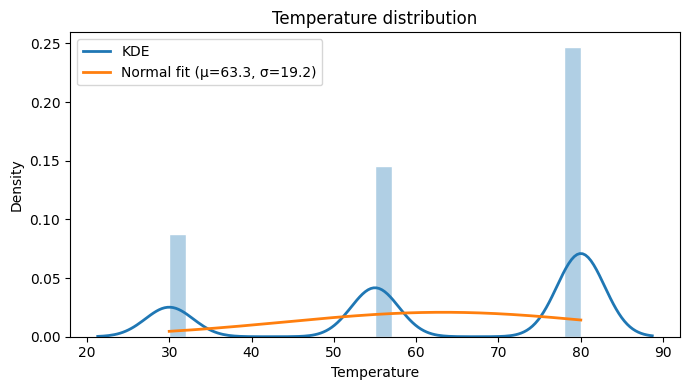

In [8]:
# Histogram of temperature + Normal fit curve + KDE curve
# (coerce to numeric to ensure proper binning)
data_temp = data.copy()
data_temp["temperature"] = pd.to_numeric(data_temp["temperature"], errors="coerce")
temps = data_temp["temperature"].dropna()

plt.figure(figsize=(7, 4))

# Histogram as density so curves are on same scale
sns.histplot(temps, bins="auto", stat="density", alpha=0.35, edgecolor="white")

# KDE curve (smooth, non-parametric)
sns.kdeplot(temps, linewidth=2, label="KDE")

# Normal curve using sample mean/std (parametric fit)
mu = temps.mean()
sigma = temps.std(ddof=1)
x = np.linspace(temps.min(), temps.max(), 200)
normal_pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, normal_pdf, linewidth=2, label=f"Normal fit (μ={mu:.1f}, σ={sigma:.1f})")

plt.title("Temperature distribution")
plt.xlabel("Temperature")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# DataFrame containing only Bar coupons
bar_coupons = data.loc[data["coupon"] == "Bar"].copy()

print("bar_coupons shape:", bar_coupons.shape)
display(bar_coupons.head())

bar_coupons shape: (2017, 26)


,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [10]:
# Proportion of Bar coupons accepted (Y == 1)
bar_accept_rate = (bar_coupons["Y"] == 1).mean()
print(f"Bar coupon acceptance rate: {bar_accept_rate:.4f} ({bar_accept_rate:.2%})")

Bar coupon acceptance rate: 0.4100 (41.00%)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


,accept_rate,n
bar_visits_group,,
<=3/month,0.370737,1818
>3/month,0.768844,199


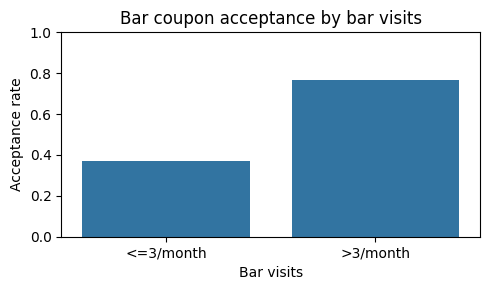

In [11]:
# Compare acceptance rate for Bar coupons by bar-visits frequency
# "3 or fewer times/month" ~ {never, <1, 1~3}; "more" ~ {4~8, >8}

def _bar_visits_group(val):
    s = str(val).strip().lower().replace(" ", "")
    if s in {"never", "0", "none"}:
        return "<=3/month"
    if s in {"less1", "lessthan1", "lt1", "<1"}:
        return "<=3/month"
    if s in {"1~3", "1to3", "1-3"}:
        return "<=3/month"
    if s in {"4~8", "4to8", "4-8"}:
        return ">3/month"
    if s in {"gt8", "greaterthan8", ">8", "8+"}:
        return ">3/month"
    return np.nan

bar_coupons["bar_visits_group"] = bar_coupons["Bar"].apply(_bar_visits_group)

summary = (
    bar_coupons.dropna(subset=["bar_visits_group"])
    .groupby("bar_visits_group")
    .agg(accept_rate=("Y", "mean"), n=("Y", "size"))
    .reindex(["<=3/month", ">3/month"])
)

display(summary)

# Optional quick visual
plt.figure(figsize=(5, 3))
sns.barplot(data=summary.reset_index(), x="bar_visits_group", y="accept_rate")
plt.title("Bar coupon acceptance by bar visits")
plt.xlabel("Bar visits")
plt.ylabel("Acceptance rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Compare acceptance: (>1 bar visit/month & age>25) vs all other bar-coupon drivers

# Map age categories to numeric lower-bounds for comparison
age_map = {
    "below21": 20,
    "21": 21,
    "26": 26,
    "31": 31,
    "36": 36,
    "41": 41,
    "46": 46,
    "50plus": 50,
}

age_num = bar_coupons["age"].map(age_map)

# "More than once a month" includes 1~3, 4~8, gt8
more_than_once = bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])
over_25 = age_num > 25

in_group = more_than_once & over_25

rate_in_group = bar_coupons.loc[in_group, "Y"].mean()
rate_others = bar_coupons.loc[~in_group, "Y"].mean()

display(pd.DataFrame({
    "group": [">1/mo & age>25", "all others"],
    "accept_rate": [rate_in_group, rate_others],
    "n": [int(in_group.sum()), int((~in_group).sum())],
}))

print(f"Acceptance rate (>1/mo & age>25): {rate_in_group:.4f} ({rate_in_group:.2%})")
print(f"Acceptance rate (all others):      {rate_others:.4f} ({rate_others:.2%})")
print(f"Difference (pp): {(rate_in_group - rate_others)*100:.2f}")

,group,accept_rate,n
0,>1/mo & age>25,0.695238,420
1,all others,0.335003,1597


Acceptance rate (>1/mo & age>25): 0.6952 (69.52%)
Acceptance rate (all others):      0.3350 (33.50%)
Difference (pp): 36.02


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
# Compare acceptance: (>1 bar visit/month, passenger not Kid(s), occupation != Farming/Fishing/Forestry) vs all other bar-coupon drivers

more_than_once = bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])
no_kid_passenger = bar_coupons["passenger"] != "Kid(s)"
not_farming_fishing_forestry = bar_coupons["occupation"] != "Farming Fishing & Forestry"

in_group = more_than_once & no_kid_passenger & not_farming_fishing_forestry

rate_in_group = bar_coupons.loc[in_group, "Y"].mean()
rate_others = bar_coupons.loc[~in_group, "Y"].mean()

display(pd.DataFrame({
    "group": [">1/mo & no kids & not F/F/F", "all others"],
    "accept_rate": [rate_in_group, rate_others],
    "n": [int(in_group.sum()), int((~in_group).sum())],
}))

print(f"Acceptance rate (>1/mo & no kids & not F/F/F): {rate_in_group:.4f} ({rate_in_group:.2%})")
print(f"Acceptance rate (all others):                 {rate_others:.4f} ({rate_others:.2%})")
print(f"Difference (pp): {(rate_in_group - rate_others)*100:.2f}")

,group,accept_rate,n
0,>1/mo & no kids & not F/F/F,0.713249,551
1,all others,0.296044,1466


Acceptance rate (>1/mo & no kids & not F/F/F): 0.7132 (71.32%)
Acceptance rate (all others):                 0.2960 (29.60%)
Difference (pp): 41.72


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
# Q6: Compare acceptance rates for drivers who meet ANY of the following:
# (1) Bar >1/mo AND passenger not Kid(s) AND maritalStatus not Widowed
# (2) Bar >1/mo AND age < 30
# (3) Restaurant(<20) >4/mo AND income < $50K

# Helper: map age categories to numeric lower-bounds
_age_map = {
    "below21": 20,
    "21": 21,
    "26": 26,
    "31": 31,
    "36": 36,
    "41": 41,
    "46": 46,
    "50plus": 50,
}

def _income_lt_50k(val):
    """Return True/False (or NaN) for whether income category is < $50K."""
    if pd.isna(val):
        return np.nan
    s = str(val).strip()
    if not s:
        return np.nan
    if s.lower().startswith("less than"):
        return True
    # e.g. "$25000 - $37499"
    nums = [int(x) for x in "".join(ch if ch.isdigit() else " " for ch in s).split()]
    if len(nums) >= 2:
        upper = max(nums)
        return upper < 50000
    return np.nan

# Common masks
bar_more_than_once = bar_coupons["Bar"].isin(["1~3", "4~8", "gt8"])
passenger_not_kid = bar_coupons["passenger"] != "Kid(s)"
not_widowed = bar_coupons["maritalStatus"] != "Widowed"

age_num = bar_coupons["age"].map(_age_map)
age_under_30 = age_num < 30

cheap_rest_more_than_4 = bar_coupons["RestaurantLessThan20"].isin(["4~8", "gt8"])
income_lt_50k = bar_coupons["income"].apply(_income_lt_50k)

# Conditions
cond1 = bar_more_than_once & passenger_not_kid & not_widowed
cond2 = bar_more_than_once & age_under_30
cond3 = cheap_rest_more_than_4 & (income_lt_50k == True)

any_cond = cond1 | cond2 | cond3

# Compare acceptance rate for "any_cond" vs everyone else
rate_any = bar_coupons.loc[any_cond, "Y"].mean()
rate_other = bar_coupons.loc[~any_cond, "Y"].mean()

summary = pd.DataFrame({
    "group": ["meets any condition", "all others"],
    "accept_rate": [rate_any, rate_other],
    "n": [int(any_cond.sum()), int((~any_cond).sum())],
})

display(summary)

print(f"Acceptance rate (any condition): {rate_any:.4f} ({rate_any:.2%})")
print(f"Acceptance rate (all others):    {rate_other:.4f} ({rate_other:.2%})")
print(f"Difference (pp): {(rate_any - rate_other)*100:.2f}")

# Optional: acceptance rate per condition (not mutually exclusive)
per_condition = pd.DataFrame({
    "condition": ["cond1", "cond2", "cond3"],
    "accept_rate": [bar_coupons.loc[cond1, "Y"].mean(), bar_coupons.loc[cond2, "Y"].mean(), bar_coupons.loc[cond3, "Y"].mean()],
    "n": [int(cond1.sum()), int(cond2.sum()), int(cond3.sum())],
})

display(per_condition)

,group,accept_rate,n
0,meets any condition,0.588918,776
1,all others,0.298147,1241


Acceptance rate (any condition): 0.5889 (58.89%)
Acceptance rate (all others):    0.2981 (29.81%)
Difference (pp): 29.08


,condition,accept_rate,n
0,cond1,0.713249,551
1,cond2,0.721739,345
2,cond3,0.453488,344


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis about drivers who accepted bar coupons
Based on the comparisons you ran, drivers who accept bar coupons tend to be those who:
Visit bars regularly (more than once per month), suggesting habit/familiarity with bars is a strong driver of acceptance.
Are younger (especially under 30) and/or older than 25 but still frequent bar-goers, indicating acceptance increases for demographics more likely to go out.
Are not traveling with kids (alone/partner/friends), implying acceptance is higher when the trip context is social/low‑constraint.
Are not widowed (and not in farming/fishing/forestry in your filter), suggesting acceptance is higher among people whose lifestyle/occupation is more compatible with going to bars.
Also often have a pattern of eating out frequently at inexpensive restaurants, which aligns with being more responsive to food/drink deals in general.
Overall: bar coupon acceptance is highest among “social/out‑and‑about” drivers—frequent bar visitors, not with kids, and in age/lifestyle groups more likely to stop at a bar.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Independent Investigation: Coffee House coupons

In the bar-coupon section, acceptance varied strongly by lifestyle/context (e.g., bar frequency, passenger type, age). Here, I explore **Coffee House** coupons and focus on how acceptance varies by the `passenger` type (and a bit of driving context).

In [15]:
# Create a DataFrame containing only Coffee House coupons
coffee = data.loc[data["coupon"] == "Coffee House"].copy()

coffee_accept_rate = coffee["Y"].mean()  # mean of 0/1 is the acceptance proportion
print("Coffee House rows:", coffee.shape[0])
print(f"Coffee House acceptance rate: {coffee_accept_rate:.4f} ({coffee_accept_rate:.2%})")

display(coffee[["passenger", "time", "expiration", "destination", "Y"]].head())

Coffee House rows: 3996
Coffee House acceptance rate: 0.4992 (49.92%)


,passenger,time,expiration,destination,Y
1,Friend(s),10AM,2h,No Urgent Place,0
3,Friend(s),2PM,2h,No Urgent Place,0
4,Friend(s),2PM,1d,No Urgent Place,0
12,Kid(s),6PM,2h,No Urgent Place,1
15,Alone,6PM,2h,Home,0


,accept_rate,n
passenger,,
Alone,0.437943,2256
Friend(s),0.596906,1228
Partner,0.570492,305
Kid(s),0.483092,207


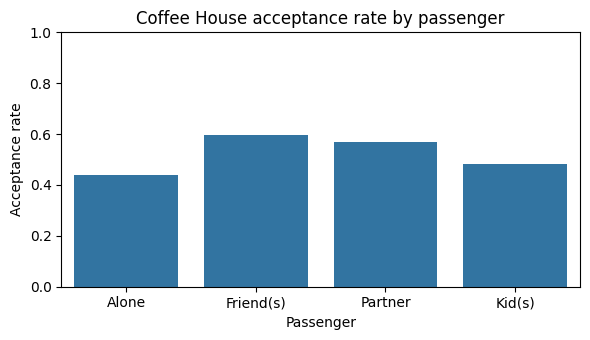

In [16]:
# Acceptance rate by passenger type (Coffee House)
coffee_by_passenger = (
    coffee.groupby("passenger")
    .agg(accept_rate=("Y", "mean"), n=("Y", "size"))
    .sort_values("n", ascending=False)
)

display(coffee_by_passenger)

plt.figure(figsize=(6, 3.5))
sns.barplot(
    data=coffee_by_passenger.reset_index(),
    x="passenger",
    y="accept_rate",
    order=coffee_by_passenger.index,
)
plt.title("Coffee House acceptance rate by passenger")
plt.xlabel("Passenger")
plt.ylabel("Acceptance rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

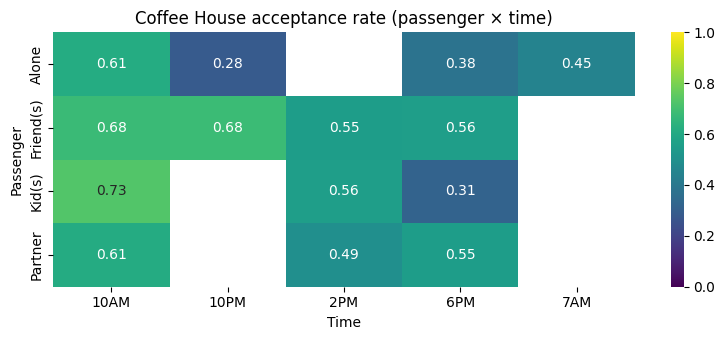

In [17]:
# Acceptance rate by passenger x time (Coffee House)
coffee_pivot = coffee.pivot_table(
    index="passenger",
    columns="time",
    values="Y",
    aggfunc="mean",
)

plt.figure(figsize=(8, 3.5))
sns.heatmap(coffee_pivot, annot=True, fmt=".2f", cmap="viridis", vmin=0, vmax=1)
plt.title("Coffee House acceptance rate (passenger × time)")
plt.xlabel("Time")
plt.ylabel("Passenger")
plt.tight_layout()
plt.show()

**Coffee House hypothesis**

- Drivers are **more likely to accept Coffee House coupons when traveling with `Friend(s)` or a `Partner`** than when `Alone`.
- Acceptance also appears **higher earlier in the day (e.g., late morning)**, consistent with coffee being a morning/early-day purchase.
- Overall, Coffee House coupon acceptance seems driven by **social context + time-of-day convenience** (it’s easier to stop when the trip is social and the timing matches typical coffee consumption).